In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
#Reading data from CSV file
data=pd.read_csv(r"C:\Users\Abhis\OneDrive\zomato data.csv")
data.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [3]:
data.shape

(56252, 13)

In [4]:
data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [5]:
data=data.drop(['address','phone','dish_liked'],axis=1)
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56252 entries, 0 to 56251
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         56236 non-null  object
 1   online_order                 56233 non-null  object
 2   book_table                   56194 non-null  object
 3   rate                         48414 non-null  object
 4   votes                        56174 non-null  object
 5   location                     56126 non-null  object
 6   rest_type                    55914 non-null  object
 7   cuisines                     56049 non-null  object
 8   approx_cost(for two people)  55731 non-null  object
 9   listed_in(type)              51642 non-null  object
dtypes: object(10)
memory usage: 4.3+ MB


In [7]:
#dropping duplicates rows
data.drop_duplicates(inplace=True)
data.shape

(38315, 10)

In [8]:
#Cleaning rate column
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', ...,
       " but we weren't blown away. It was",
       " also a slightly larger portion size wud be much appreciated...\\n\\nService - 5/10\\n\\nReally needs a lot of tweak up... the waiters are never to be found on the floor... they lack knowledge of dishes... very uninviting overall...\\n\\nOverall not a grt experience :(')",
       ' small place '], dtype=object)

In [9]:
#Removing long paragraphs and "/5" from rate column
def handlerate(value):
    match=re.match(r'^(\d+(\.\d+)?)/5$',str(value).strip())
    if match:
        return float(match.group(1))
    else:
        return np.nan

data['rate']= data['rate'].apply(handlerate)
data['rate'].head()
    

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [10]:
data.rate.isnull().sum()

np.int64(23306)

In [11]:
#filling Null values in rate column with mean
data['rate'].fillna(data['rate'].mean(),inplace=True)
data['rate'].isnull().sum()
data['rate'].round(1)

C:\Users\Abhis\AppData\Local\Temp\ipykernel_33668\1558264254.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['rate'].fillna(data['rate'].mean(),inplace=True)


0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
56247    3.7
56248    3.7
56249    3.7
56250    3.7
56251    3.7
Name: rate, Length: 38315, dtype: float64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38315 entries, 0 to 56251
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         38314 non-null  object 
 1   online_order                 38311 non-null  object 
 2   book_table                   38278 non-null  object 
 3   rate                         38315 non-null  float64
 4   votes                        38258 non-null  object 
 5   location                     38218 non-null  object 
 6   rest_type                    38072 non-null  object 
 7   cuisines                     38165 non-null  object 
 8   approx_cost(for two people)  37972 non-null  object 
 9   listed_in(type)              35567 non-null  object 
dtypes: float64(1), object(9)
memory usage: 3.2+ MB


In [13]:
#Dropping Null Values 
data.dropna(inplace=True)
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [14]:
data.rename(columns={'approx_cost(for two people)':'Cost2Plates','listed_in(type)':'Type'},inplace=True)
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2Plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [15]:
#Cleaning name column
data['name'].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ...,
       " 'RATED\\n  Ambience- did not expect a beautiful place like this in a mall\\nService was top notch and our table was always attended to\\nFood - though always prejudiced towards Chinese this was one of the better more unique Chinese tastes we had in some time')",
       " 'RATED\\n  Ambiance - 6/10\\n\\nIt needs to be more tidy... used tissues scrambled the floor",
       'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...'],
      dtype=object)

In [16]:
def clean_name(value):
    # Convert to string just in case
    if not isinstance(value, str):
        return np.nan

    # Remove if text is too long (e.g., more than 5 words)
    if len(value.split()) > 5:
        return np.nan

    # Remove if it contains too many special characters
    if re.match(r'^[^a-zA-Z0-9\s]{5,}$', value):
        return np.nan

    # Remove specific phrases like "rated 3.0", "rated 4.5", etc.
    if re.search(r"rated\s*\d+(\.\d+)?", value.lower()):
        return np.nan
    if value.startswith("'RATED\\n"):
            return np.nan

    
    return value.strip()

# Apply it to your DataFrame
data['name'] = data['name'].apply(clean_name)
data['name'].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ..., 'minced up',
       'The Pallet', 'do visit this place."")'], dtype=object)

In [17]:
#Cleaning online_order column
data['online_order'].unique()

array(['Yes', 'No', " ('Rated 4.0'", ...,
       ' ""RATED\\n  Truly what a wonderful place. From the walk through the green route to the actual place',
       ' dirty tables etc... is really a turn off...\\n\\nFood - 7/10\\n\\nVeg Nachos - Lacks the punch... wish the salsa tasted better... nd also wud be grt if u cud introduce an option without gluocumole (not really a fan of it)\\n\\nVeg Sheek Kabab - Tasted Grt',
       " 'RATED\\n  Beer cafe "], dtype=object)

In [18]:
def handleorder(value):
    if(value== 'Yes' or value == 'No'):
        return value
    else:
        return np.nan

data['online_order']= data['online_order'].apply(handleorder)
data['online_order'].unique()

array(['Yes', 'No', nan], dtype=object)

In [19]:
#Cleaning book_table column
data['book_table'].unique()

array(['Yes', 'No', " 'RATED\\n  Amazing cafe", ...,
       ' ""RATED\\n  A decent place to have some traditional oriental cuisine. We were craving for some kick-ass noodles. While we did get the noodles',
       ' but cud be a bit less spicy... otherwise was grt',
       'VR Bengaluru\\nBeen here a few times '], dtype=object)

In [20]:
def handlebooking(value):
    if(value== 'Yes' or value == 'No'):
        return value
    else:
        return np.nan

data['book_table']= data['book_table'].apply(handlebooking)
data['book_table'].unique()

array(['Yes', 'No', nan], dtype=object)

In [21]:
#Cleaning votes coulmn
data['votes'].unique()

array(['775', '787', '918', ...,
       ' also strong! Will definitely be visiting soon again."")',
       ' as I said about the place',
       ' good options of beer\\nOne of the few places in Whitefield which serve Budweiser draught beer\\nThe ambience is ok\\nService is little slow '],
      dtype=object)

In [22]:
data['votes']=pd.to_numeric(data['votes'],errors='coerce')
data['votes'].isnull().sum()

np.int64(3960)

In [23]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30319 entries, 0 to 56248
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          30319 non-null  object 
 1   online_order  30319 non-null  object 
 2   book_table    30319 non-null  object 
 3   rate          30319 non-null  float64
 4   votes         30319 non-null  float64
 5   location      30319 non-null  object 
 6   rest_type     30319 non-null  object 
 7   cuisines      30319 non-null  object 
 8   Cost2Plates   30319 non-null  object 
 9   Type          30319 non-null  object 
dtypes: float64(2), object(8)
memory usage: 2.5+ MB


In [24]:
data.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
Cost2Plates     0
Type            0
dtype: int64

In [25]:
#Cleaning location column
data['location'].value_counts()

location
BTM                     2364
Whitefield              1696
HSR                     1606
Marathahalli            1495
Indiranagar             1437
                        ... 
Kengeri                    5
Nagarbhavi                 4
Rajarajeshwari Nagar       2
Jakkur                     1
Peenya                     1
Name: count, Length: 93, dtype: int64

In [26]:
#Clustering locations having less than 300 together as  others 
location = data['location'].value_counts(ascending = False)
location_lessthan300 = location[location<300]

def handle_location(value):
    if(value in location_lessthan300):
        return 'others'
    else:
        return value

data['location'] = data['location'].apply(handle_location)
data['location'].value_counts()

location
others                   4901
BTM                      2364
Whitefield               1696
HSR                      1606
Marathahalli             1495
Indiranagar              1437
JP Nagar                 1263
Koramangala 5th Block    1153
Jayanagar                1123
Electronic City          1119
Bellandur                1012
Bannerghatta Road         963
Sarjapur Road             812
Brigade Road              563
Banashankari              552
Brookefield               538
Koramangala 7th Block     525
New BEL Road              518
Kalyan Nagar              512
Koramangala 6th Block     505
Koramangala 1st Block     498
Malleshwaram              474
Ulsoor                    455
Koramangala 4th Block     447
Frazer Town               436
Basavanagudi              435
Rajajinagar               429
MG Road                   397
Kammanahalli              394
Banaswadi                 383
Old Airport Road          360
Residency Road            332
Richmond Road             318
D

In [27]:
data['rest_type'].value_counts()

rest_type
Quick Bites                   11643
Casual Dining                  6395
Cafe                           2098
Delivery                       1418
Dessert Parlor                 1417
                              ...  
Pop Up                            1
Bakery, Sweet Shop                1
Quick Bites, Kiosk                1
Dessert Parlor, Food Court        1
Food Court, Casual Dining         1
Name: count, Length: 93, dtype: int64

In [28]:
#counting rest_types having less than 1000 
rest_types = data['rest_type'].value_counts(ascending = False)
rest_types

rest_types_lessthan1000 = rest_types[rest_types<1000]
rest_types_lessthan1000

rest_type
Bakery                        717
Casual Dining, Bar            554
Beverage Shop                 482
Food Court                    402
Bar                           367
                             ... 
Pop Up                          1
Bakery, Sweet Shop              1
Quick Bites, Kiosk              1
Dessert Parlor, Food Court      1
Food Court, Casual Dining       1
Name: count, Length: 87, dtype: int64

In [29]:
#Clustering all the rest_types having less than 1000 together as others
def handle_rest_type(value):
    if(value in rest_types_lessthan1000):
        return 'others'
    else:
        return value

data['rest_type'] = data['rest_type'].apply(handle_rest_type)
data['rest_type'].value_counts()

rest_type
Quick Bites           11643
Casual Dining          6395
others                 6177
Cafe                   2098
Delivery               1418
Dessert Parlor         1417
Takeaway, Delivery     1171
Name: count, dtype: int64

In [30]:
#Clustering cuisines having less than 100 values together as others
cuisines = data['cuisines'].value_counts(ascending = False)
cuisines_lessthan100 = cuisines[cuisines<100]

def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value

data['cuisines'] = data['cuisines'].apply(handle_cuisines)
data['cuisines'].value_counts()

cuisines
others                                              16476
North Indian                                         1732
North Indian, Chinese                                1469
South Indian                                         1115
Bakery, Desserts                                      567
Biryani                                               541
Fast Food                                             481
South Indian, North Indian, Chinese                   469
Desserts                                              415
Cafe                                                  393
Bakery                                                377
Chinese                                               308
Ice Cream, Desserts                                   300
Mithai, Street Food                                   250
Chinese, North Indian                                 227
Desserts, Ice Cream                                   219
North Indian, Chinese, Biryani                        213
North

In [31]:
data['Cost2Plates'].unique()

array(['800', '300', '600', '550', '500', '450', '650', '700', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,800', '330', '2,000', '2,500', '3,000', '2,800', '3,400',
       '1,900', '2,200', '40', '2,100', '3,500', '4,000', '2,600', '120',
       '1,450', '469', '70', '60', '560', '1,250', '240', '360', '2,400',
       '1,050', '2,300', '4,100', '5,000', '2,700', '4,500', '140',
       '1,650'], dtype=object)

In [32]:
#Removing "," from Cost2plates column
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',','')
        return float(value)
    else:
        return float(value)

data['Cost2Plates'] = data['Cost2Plates'].apply(handlecomma)
data['Cost2Plates'].unique()

array([ 800.,  300.,  600.,  550.,  500.,  450.,  650.,  700.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1800.,  330.,
       2000., 2500., 3000., 2800., 3400., 1900., 2200.,   40., 2100.,
       3500., 4000., 2600.,  120., 1450.,  469.,   70.,   60.,  560.,
       1250.,  240.,  360., 2400., 1050., 2300., 4100., 5000., 2700.,
       4500.,  140., 1650.])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, 'others'),
  Text(1, 0, 'BTM'),
  Text(2, 0, 'Whitefield'),
  Text(3, 0, 'HSR'),
  Text(4, 0, 'Marathahalli'),
  Text(5, 0, 'Indiranagar'),
  Text(6, 0, 'JP Nagar'),
  Text(7, 0, 'Koramangala 5th Block'),
  Text(8, 0, 'Jayanagar'),
  Text(9, 0, 'Electronic City'),
  Text(10, 0, 'Bellandur'),
  Text(11, 0, 'Bannerghatta Road'),
  Text(12, 0, 'Sarjapur Road'),
  Text(13, 0, 'Brigade Road'),
  Text(14, 0, 'Banashankari'),
  Text(15, 0, 'Brookefield'),
  Text(16, 0, 'Koramangala 7th Block'),
  Text(17, 0, 'New BEL Road'),
  Text(18, 0, 'Kalyan Nagar'),
  Text(19, 0, 'Koramangala 6th Block'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Ulsoor'),
  Text(23, 0, 'Koramangala 4th Block'),
  Text(24, 0, 'Frazer Town'),
  Text(25, 0, 'Basavanagudi'),


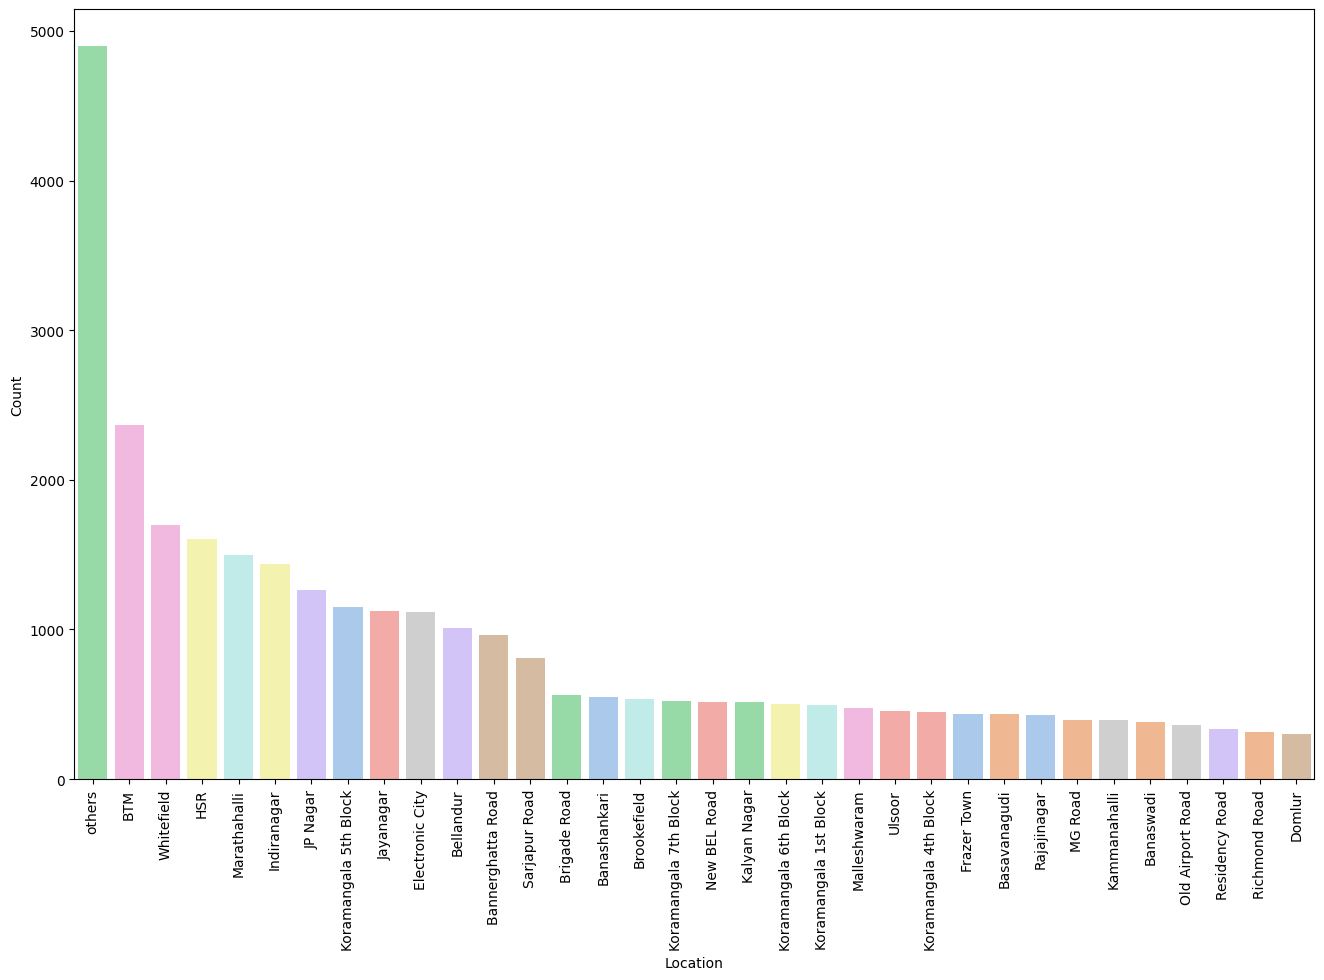

In [33]:
#Count plot of varios locations
plt.figure(figsize = (16,10))
ax = sns.countplot(data=data, x='location',hue='location',order=data['location'].value_counts().index ,palette='pastel',legend=False)
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)

Text(0, 0.5, 'Count')

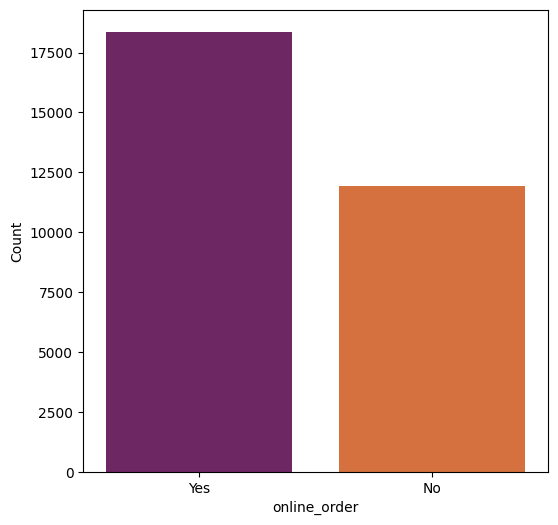

In [34]:
#Visualising online order
plt.figure(figsize = (6,6))
ax = sns.countplot(data=data, x='online_order',hue='online_order',palette='inferno',legend=False)
plt.xlabel('online_order')
plt.ylabel('Count')

Text(0, 0.5, 'rate')

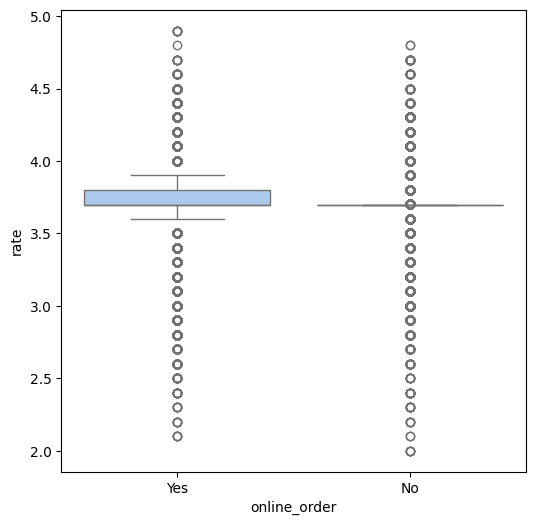

In [35]:
#Visualizing online order vs rate
plt.figure(figsize = (6,6))
sns.boxplot(data=data, x='online_order',y='rate',hue="online_order",palette='pastel',legend=False)
plt.xlabel('online_order')
plt.ylabel('rate')

(0.0, 5.0)

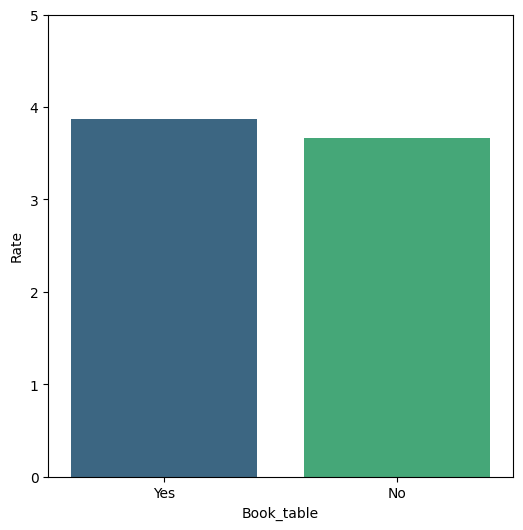

In [36]:
#Visualising Book table vs Rate
grouped_data=data.groupby('book_table')['rate'].mean().reset_index()

grouped_data = grouped_data.sort_values(by= 'rate',ascending=False)

plt.figure(figsize = (6,6))
sns.barplot(data=grouped_data, x='book_table',y='rate',hue='book_table',palette='viridis',legend=False)
plt.xlabel('Book_table')
plt.ylabel('Rate')
plt.ylim(0,5)

In [38]:
#Visualizing online order facility, location wise
df1=data.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1=pd.read_csv('location_online.csv')
df1=pd.pivot_table(df1,values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc='sum')
df1

name      
online_order             No   Yes
location                         
BTM                     750  1614
Banashankari            254   298
Banaswadi               191   192
Bannerghatta Road       368   595
Basavanagudi            173   262
Bellandur               385   627
Brigade Road            218   345
Brookefield             180   358
Domlur                  158   146
Electronic City         612   507
Frazer Town             201   235
HSR                     397  1209
Indiranagar             537   900
JP Nagar                489   774
Jayanagar               337   786
Kalyan Nagar            206   306
Kammanahalli            172   222
Koramangala 1st Block   144   354
Koramangala 4th Block   207   240
Koramangala 5th Block   372   781
Koramangala 6th Block   181   324
Koramangala 7th Block   154   371
MG Road                 213   184
Malleshwaram            183   291
Marathahalli            560   935
New BEL Road            218   300
Old Airport Road        176   184
Rajajinagar             201   228
Residency Road          194   138
Richmond Road           216   102
Sarjapur Road           237   575
Ulsoor                  158   297
Whitefield              753   943
others                 2147  2754

<Axes: xlabel='location'>

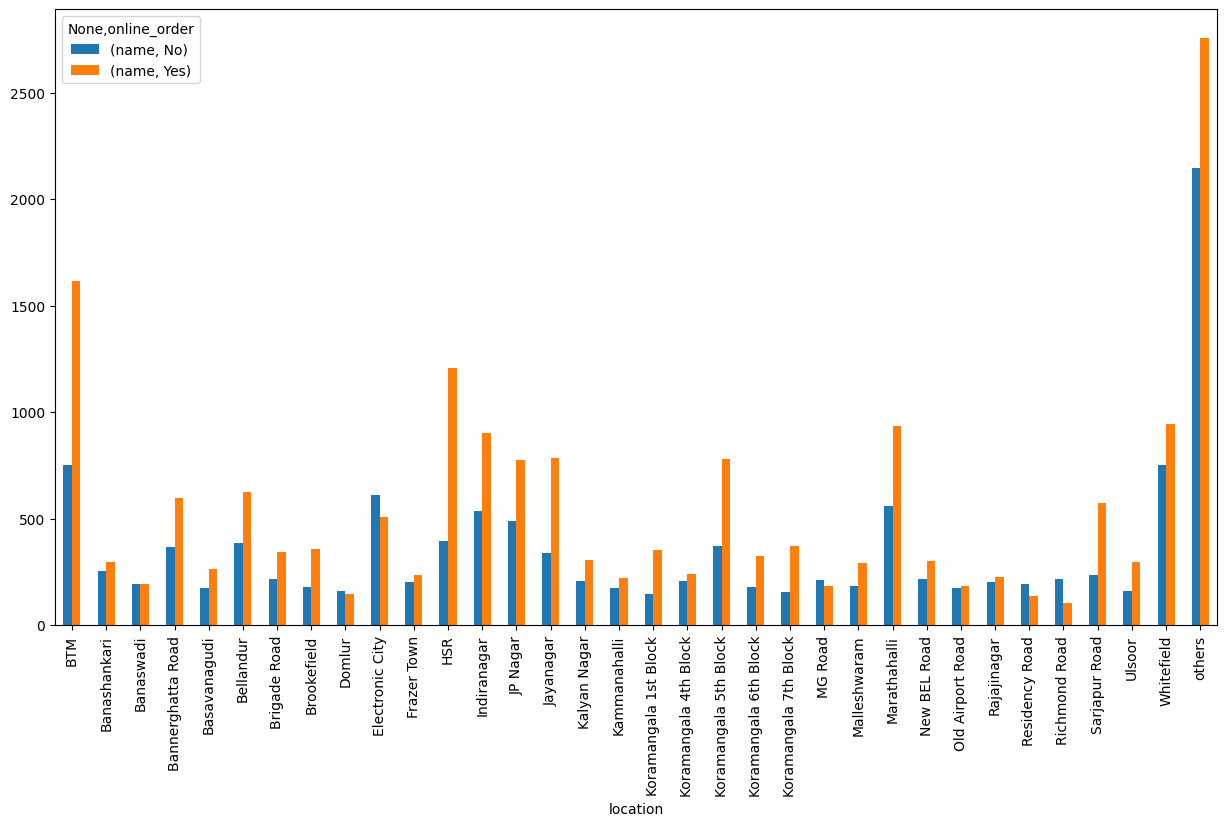

In [39]:
df1.plot(kind = 'bar', figsize = (15,8))

In [40]:
#Visualising book table facility, location wise
df2=data.groupby(['location','book_table'])['name'].count()
df2.to_csv('location_booktable.csv')
df2=pd.read_csv('location_booktable.csv')
df2=pd.pivot_table(df2,values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc='sum')
df2

name     
book_table               No  Yes
location                        
BTM                    2271   93
Banashankari            511   41
Banaswadi               377    6
Bannerghatta Road       908   55
Basavanagudi            431    4
Bellandur               946   66
Brigade Road            485   78
Brookefield             481   57
Domlur                  284   20
Electronic City        1059   60
Frazer Town             432    4
HSR                    1478  128
Indiranagar            1148  289
JP Nagar               1078  185
Jayanagar               962  161
Kalyan Nagar            431   81
Kammanahalli            369   25
Koramangala 1st Block   473   25
Koramangala 4th Block   316  131
Koramangala 5th Block   869  284
Koramangala 6th Block   453   52
Koramangala 7th Block   461   64
MG Road                 240  157
Malleshwaram            437   37
Marathahalli           1399   96
New BEL Road            485   33
Old Airport Road        320   40
Rajajinagar             400   29
Residency Road          251   81
Richmond Road           261   57
Sarjapur Road           730   82
Ulsoor                  382   73
Whitefield             1545  151
others                 4323  578

<Axes: xlabel='location'>

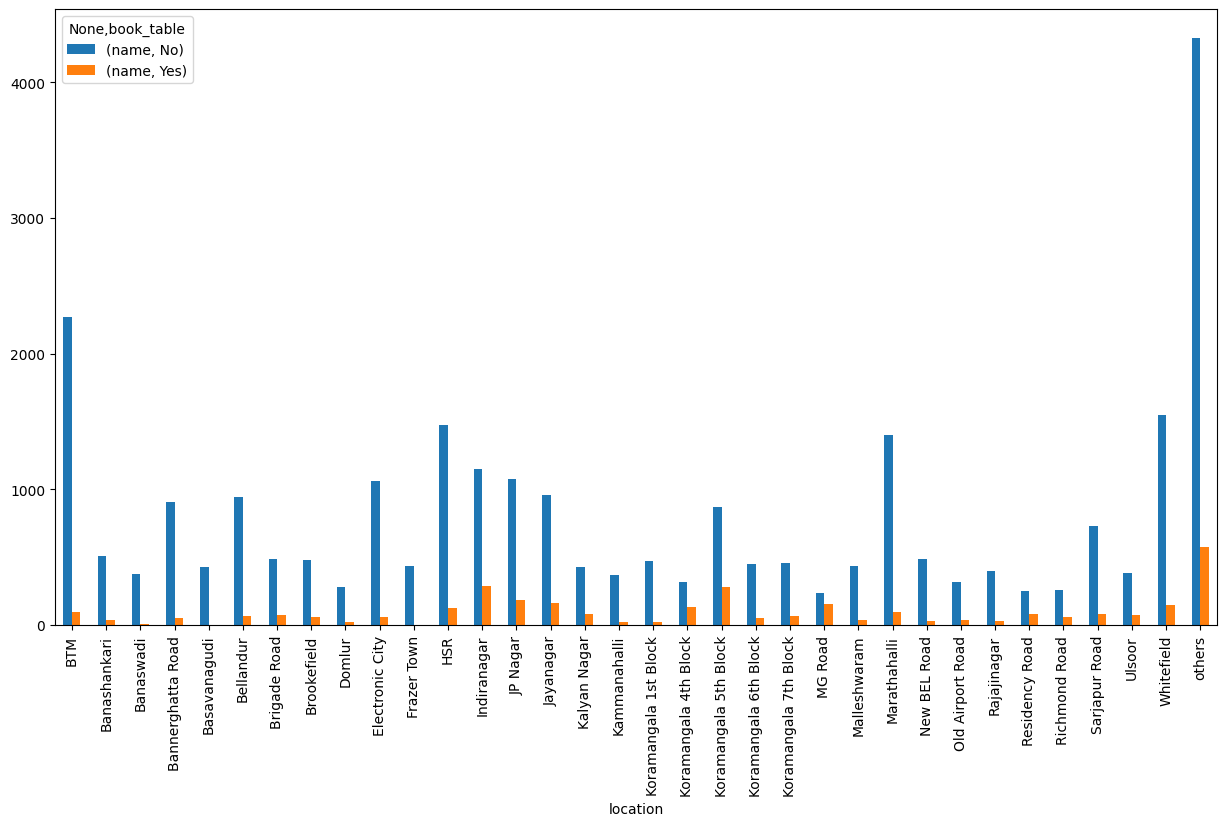

In [41]:
df2.plot(kind = 'bar', figsize = (15,8))

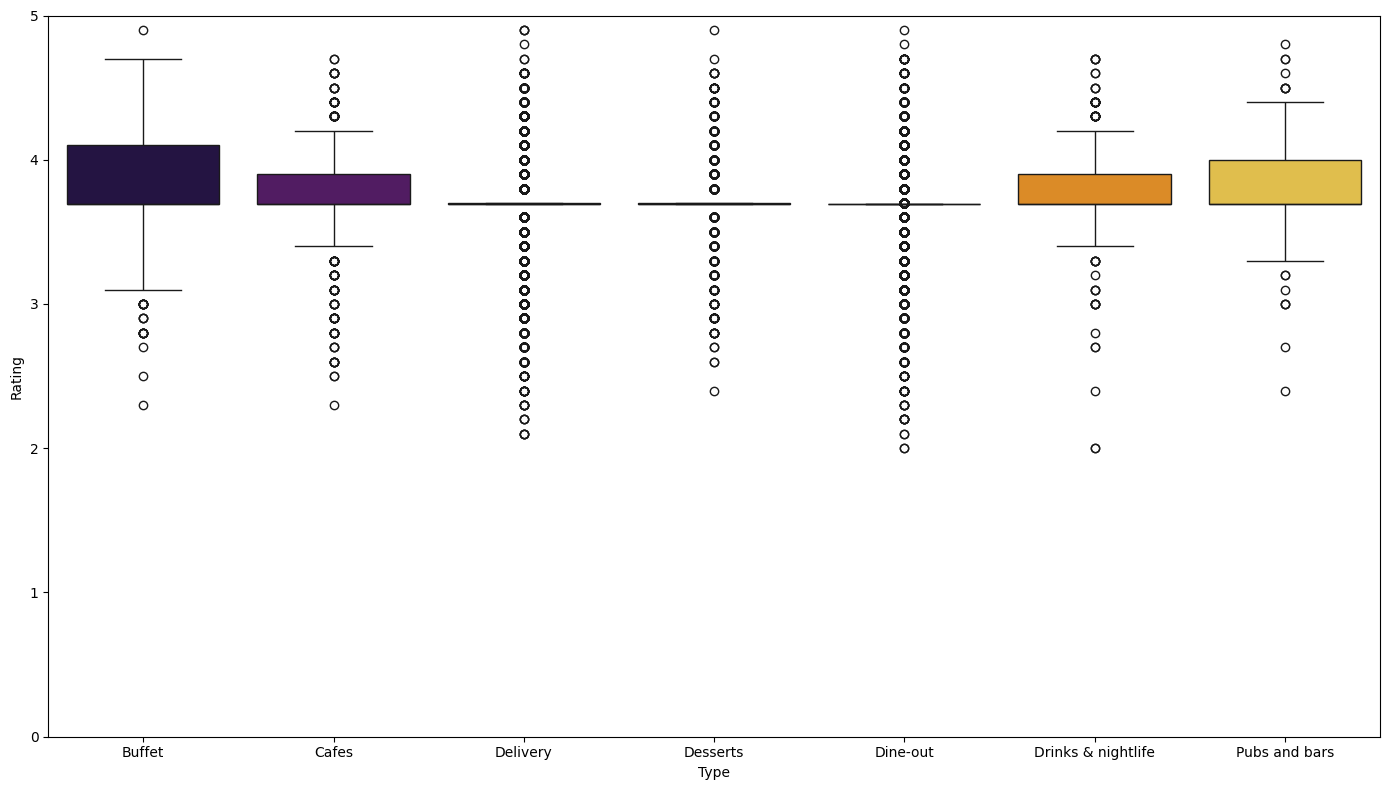

In [42]:
#Visualising types of restaurants vs rate
plt.figure(figsize = (14,8))
sns.boxplot(x = 'Type', y = 'rate', hue = 'Type',data = data, palette='inferno',legend = False)
plt.xlabel('Type')
plt.ylabel('Rating')
plt.ylim(0,5)
plt.tight_layout()
plt.show()

In [43]:
#Grouping type of restaurants, location wise
df3=data.groupby(['location','Type'])['name'].count()
df3.to_csv('location_Type.csv')
df3=pd.read_csv('location_Type.csv')
df3=pd.pivot_table(df3,values=None, index=['location'], columns=['Type'], fill_value=0, aggfunc='sum')
df3

name                                   \
Type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                        9    44     1367      105      821   
Banashankari               5    24      233       46      237   
Banaswadi                  0    12      150       18      199   
Bannerghatta Road          6    25      467       91      367   
Basavanagudi               2     8      187       41      196   
Bellandur                 18    31      476       64      398   
Brigade Road              13    21      222       45      231   
Brookefield                3    15      275       37      206   
Domlur                     5    12      161       24       89   
Electronic City           14    19      517       69      469   
Frazer Town                1    10      247       43      131   
HSR                       11    31     1003      102      446   
Indiranagar               20    74      717      116      426   
JP Nagar                  19    38      597      100      482   
Jayanagar                 15    42      508      113      436   
Kalyan Nagar               8    20      173       43      257   
Kammanahalli               2    12      153       17      208   
Koramangala 1st Block      3    10      298       30      145   
Koramangala 4th Block     10    28      210       32      118   
Koramangala 5th Block     29    76      502      105      388   
Koramangala 6th Block     11    24      245       40      152   
Koramangala 7th Block      5    30      220       69      178   
MG Road                   23    33      106       31      158   
Malleshwaram               3    24      177       62      190   
Marathahalli              20    26      818       91      530   
New BEL Road               2    24      256       30      198   
Old Airport Road           8     5      164       30      142   
Rajajinagar                9     4      188       44      179   
Residency Road            14    19       91       28      143   
Richmond Road             27     7      101       30      141   
Sarjapur Road             10    17      429       76      262   
Ulsoor                     8    21      195       25      183   
Whitefield                17    37      855      113      635   
others                    75   153     2360      322     1797   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                    8            10  
Banashankari                           7             0  
Banaswadi                              3             1  
Bannerghatta Road                      6             1  
Basavanagudi                           1             0  
Bellandur                             13            12  
Brigade Road                          21            10  
Brookefield                            2             0  
Domlur                                 8             5  
Electronic City                       16            15  
Frazer Town                            2             2  
HSR                                    5             8  
Indiranagar                           43            41  
JP Nagar                              22             5  
Jayanagar                              9             0  
Kalyan Nagar                          11             0  
Kammanahalli                           2             0  
Koramangala 1st Block                  4             8  
Koramangala 4th Block                 30            19  
Koramangala 5th Block                 30            23  
Koramangala 6th Block                 17            16  
Koramangala 7th Block                  9            14  
MG Road                               25            21  
Malleshwaram                          11             7  
Marathahalli                           9             1  
New BEL Road          

<Axes: xlabel='location'>

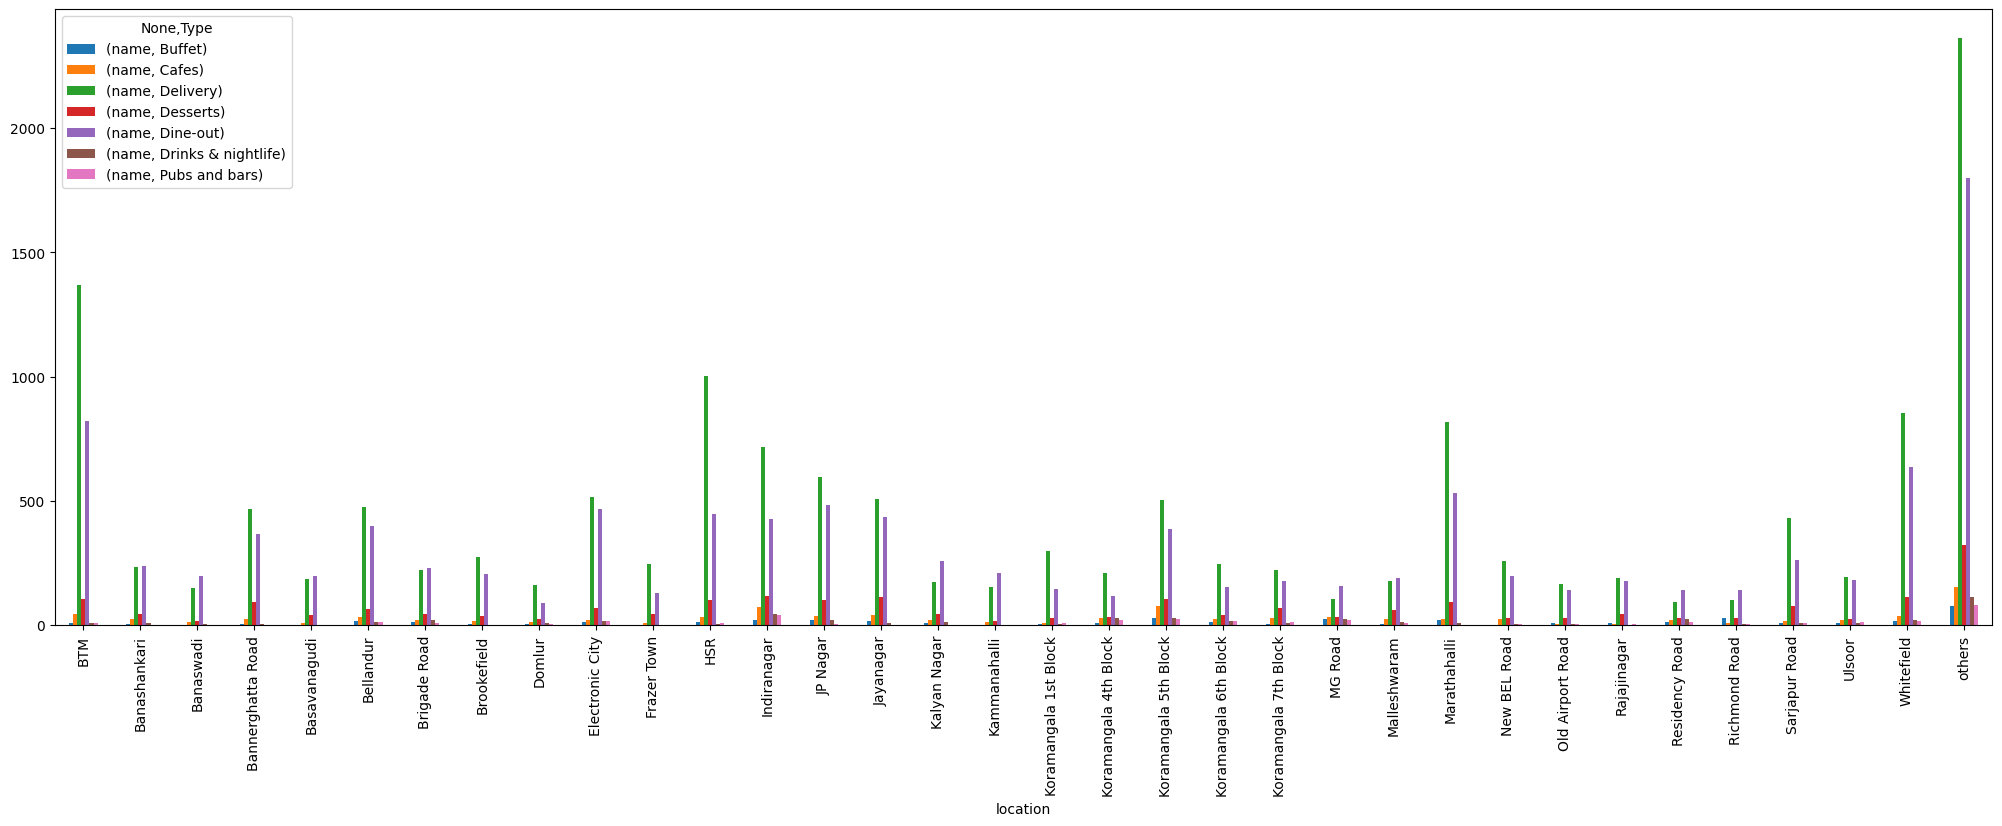

In [44]:
df3.plot(kind = 'bar', figsize = (25,8))

In [45]:
#No. of votes, location wise
df4 = data[['location','votes']]
df4.drop_duplicates()
df5 = df4.groupby(['location'])['votes'].sum()
df5 = df5.to_frame()
df5 = df5.sort_values('votes',ascending=False)
df5.head()

,votes
location,
others,994882.0
Koramangala 5th Block,772515.0
Indiranagar,569723.0
JP Nagar,323896.0
Jayanagar,322875.0


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, 'others'),
  Text(1, 0, 'Koramangala 5th Block'),
  Text(2, 0, 'Indiranagar'),
  Text(3, 0, 'JP Nagar'),
  Text(4, 0, 'Jayanagar'),
  Text(5, 0, 'BTM'),
  Text(6, 0, 'HSR'),
  Text(7, 0, 'Whitefield'),
  Text(8, 0, 'Koramangala 4th Block'),
  Text(9, 0, 'Koramangala 6th Block'),
  Text(10, 0, 'Marathahalli'),
  Text(11, 0, 'Koramangala 7th Block'),
  Text(12, 0, 'MG Road'),
  Text(13, 0, 'Brigade Road'),
  Text(14, 0, 'Sarjapur Road'),
  Text(15, 0, 'Koramangala 1st Block'),
  Text(16, 0, 'Residency Road'),
  Text(17, 0, 'Bannerghatta Road'),
  Text(18, 0, 'Bellandur'),
  Text(19, 0, 'Banashankari'),
  Text(20, 0, 'New BEL Road'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Kalyan Nagar'),
  Text(23, 0, 'Electronic City'),
  Text(24, 0, 'Brookefield'),
  Text(25, 0, 'Ulsoor'),
  

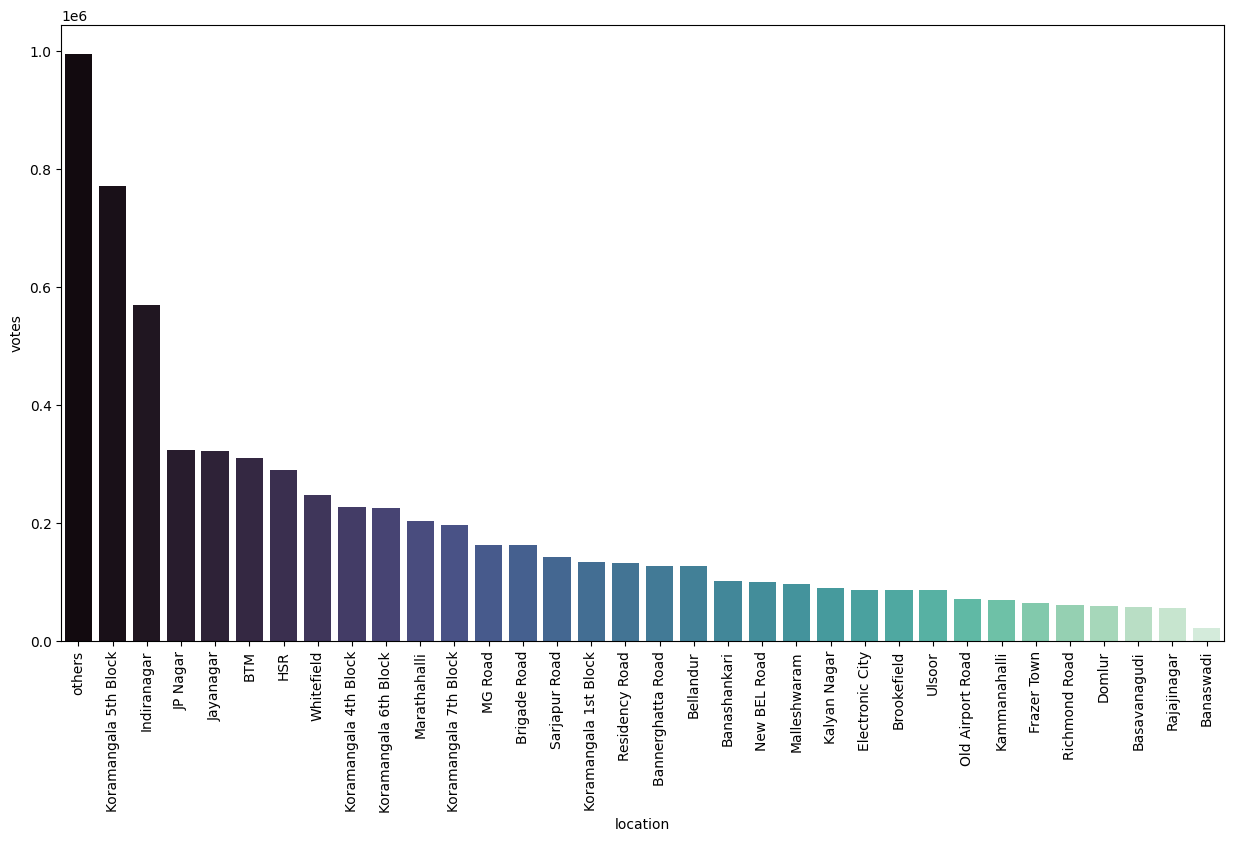

In [46]:
plt.figure(figsize = (15,8))
sns.barplot(data=df5,x='location' ,y='votes',hue='location',palette='mako',legend=False)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Casual Dining'),
  Text(1, 0, 'others'),
  Text(2, 0, 'Quick Bites'),
  Text(3, 0, 'Cafe'),
  Text(4, 0, 'Dessert Parlor'),
  Text(5, 0, 'Delivery'),
  Text(6, 0, 'Takeaway, Delivery')])

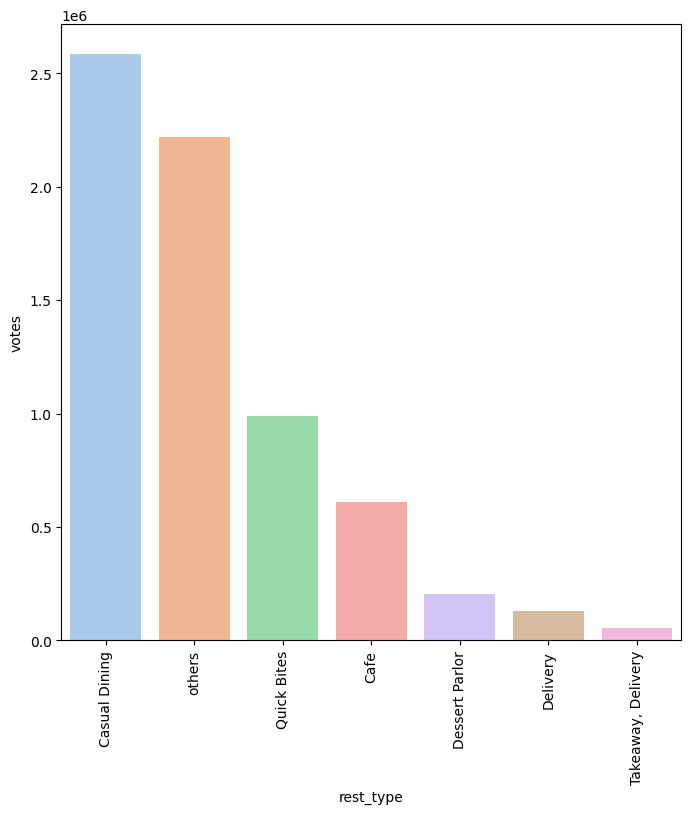

In [47]:
#No. of votes each restaurant type received
df6 = data[['rest_type','votes']]
df6.drop_duplicates()
df7 = df6.groupby(['rest_type'])['votes'].sum()
df7 = df7.to_frame()
df7 = df7.sort_values('votes',ascending=False)
df7.head()
plt.figure(figsize = (8,8))
sns.barplot(data=df7,x='rest_type' ,y='votes',hue='rest_type',palette='pastel',legend=False)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, '100.0'),
  Text(1, 0, '150.0'),
  Text(2, 0, '200.0'),
  Text(3, 0, '250.0'),
  Text(4, 0, '300.0'),
  Text(5, 0, '350.0'),
  Text(6, 0, '400.0'),
  Text(7, 0, '450.0'),
  Text(8, 0, '500.0'),
  Text(9, 0, '550.0'),
  Text(10, 0, '600.0'),
  Text(11, 0, '650.0'),
  Text(12, 0, '700.0'),
  Text(13, 0, '750.0'),
  Text(14, 0, '800.0'),
  Text(15, 0, '850.0'),
  Text(16, 0, '900.0'),
  Text(17, 0, '950.0'),
  Text(18, 0, '1000.0'),
  Text(19, 0, '1200.0'),
  Text(20, 0, '1500.0')])

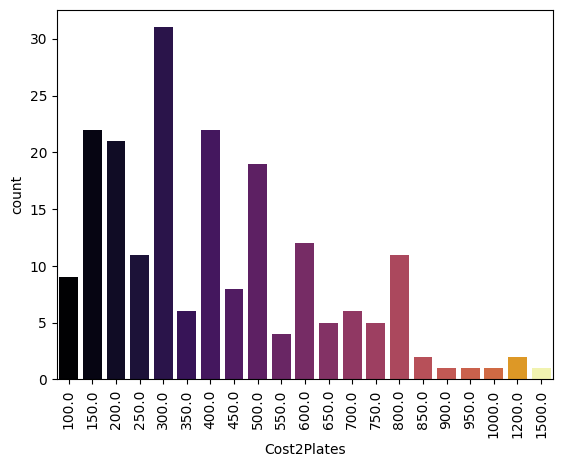

In [48]:
#Average order spending by couples
top_orders = data['Cost2Plates'].head(200)
top_orders
sns.countplot(x=top_orders,hue=top_orders,palette='inferno',legend=False)
plt.xticks(rotation=90)

In [49]:
#Visualising Top cuisines
df8=data[['cuisines','votes']]
df8.drop_duplicates()
df9=df8.groupby(['cuisines'])['votes'].sum()
df9=df9.to_frame()
df9=df9.sort_values('votes',ascending=False)
df9.head()

,votes
cuisines,
others,5168966.0
North Indian,316407.0
"North Indian, Chinese",168041.0
South Indian,80617.0
"North Indian, Mughlai",62572.0


In [50]:
df9=df9.iloc[1:, :]
df9.head()

,votes
cuisines,
North Indian,316407.0
"North Indian, Chinese",168041.0
South Indian,80617.0
"North Indian, Mughlai",62572.0
"Ice Cream, Desserts",54155.0


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'North Indian, Chinese'),
  Text(2, 0, 'South Indian'),
  Text(3, 0, 'North Indian, Mughlai'),
  Text(4, 0, 'Ice Cream, Desserts'),
  Text(5, 0, 'Chinese'),
  Text(6, 0, 'Biryani, North Indian, Chinese'),
  Text(7, 0, 'Chinese, Momos'),
  Text(8, 0, 'North Indian, South Indian'),
  Text(9, 0, 'South Indian, North Indian, Chinese'),
  Text(10, 0, 'Burger, Fast Food'),
  Text(11, 0, 'Desserts'),
  Text(12, 0, 'Biryani'),
  Text(13, 0, 'Bakery, Desserts'),
  Text(14, 0, 'Desserts, Beverages'),
  Text(15, 0, 'Finger Food'),
  Text(16, 0, 'Cafe'),
  Text(17, 0, 'Pizza, Fast Food'),
  Text(18, 0, 'Cafe, Continental'),
  Text(19, 0, 'Chinese, Thai'),
  Text(20, 0, 

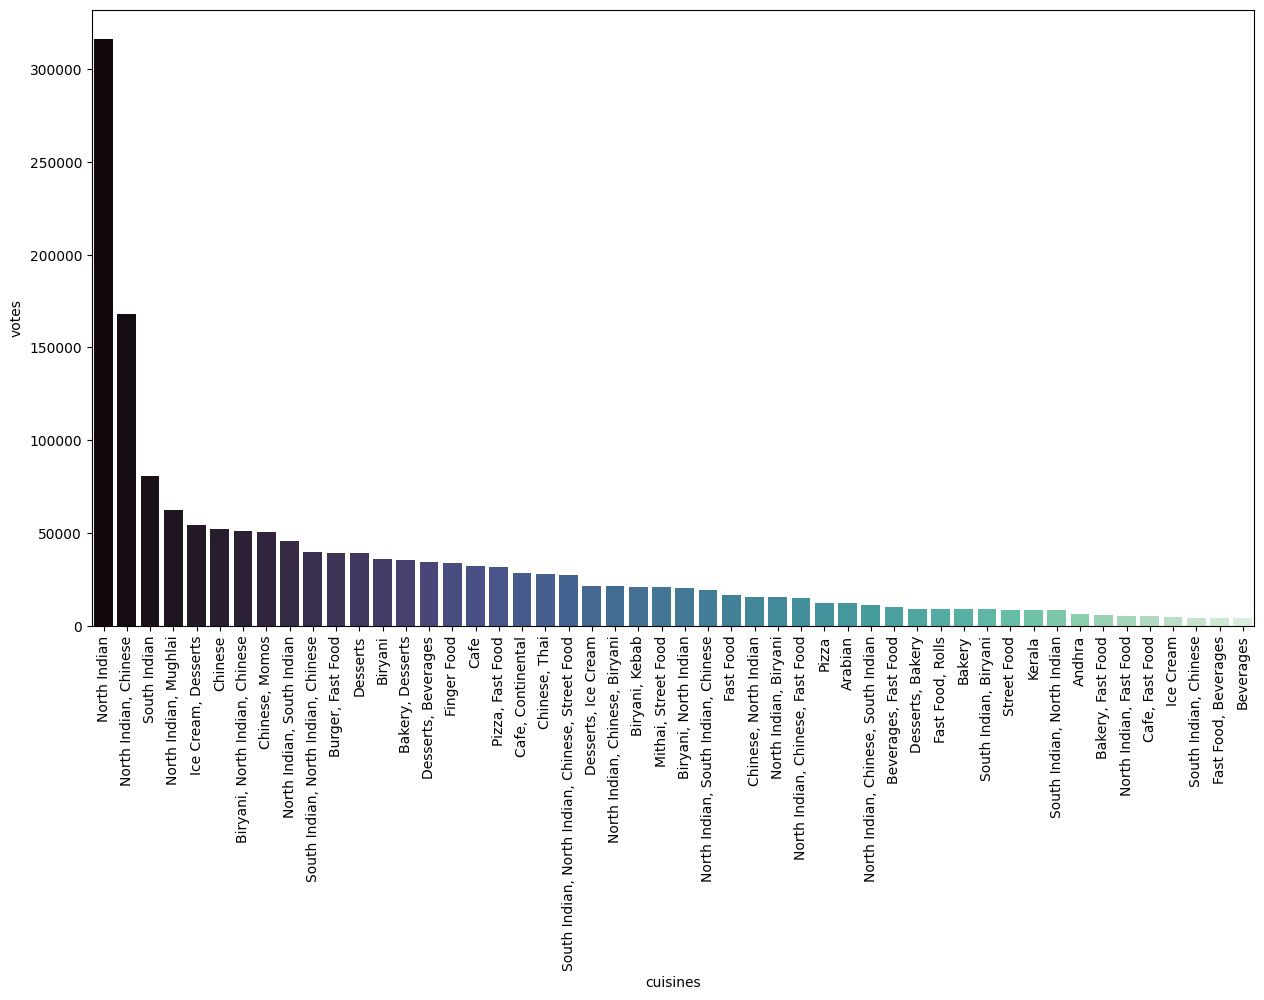

In [51]:
plt.figure(figsize = (15,8))
sns.barplot(data=df9,x='cuisines' ,y='votes',hue='cuisines',palette='mako',legend=False)
plt.xticks(rotation=90)